In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from testing.leandro.preprocess_class import *
from testing.leandro.plots import *
from testing.leandro.filters import *
from testing.leandro.metrics import *

In [4]:
#datasets = ['Uzel2022', 'Skora2018', 'Nichols2017', 'Kato2015', 'Kaplan2020']

datasets = ['Uzel2022', 'Kato2015']

transform = MinMaxScaler(feature_range=(-1,1))
smooth_method = 'fft'
resample_dt = .1
norm_dim = 'neurons'

for ds in datasets:
    prep = PreprocessDataset(ds, transform, smooth_method, resample_dt, norm_dim)
    prep.preprocess_pipeline()

In [4]:
oneWorm = prep.data['worm0']

# Plot Functions
---

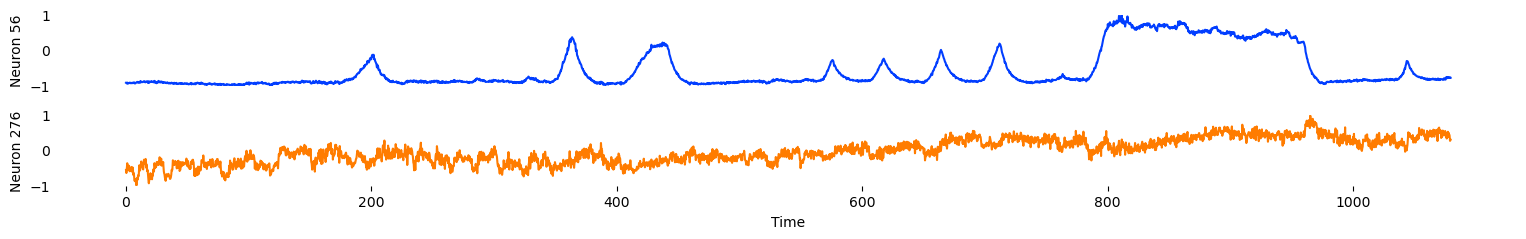

In [5]:
plot_signals(oneWorm['calcium_data'], oneWorm['time_in_seconds'], [56, 276])

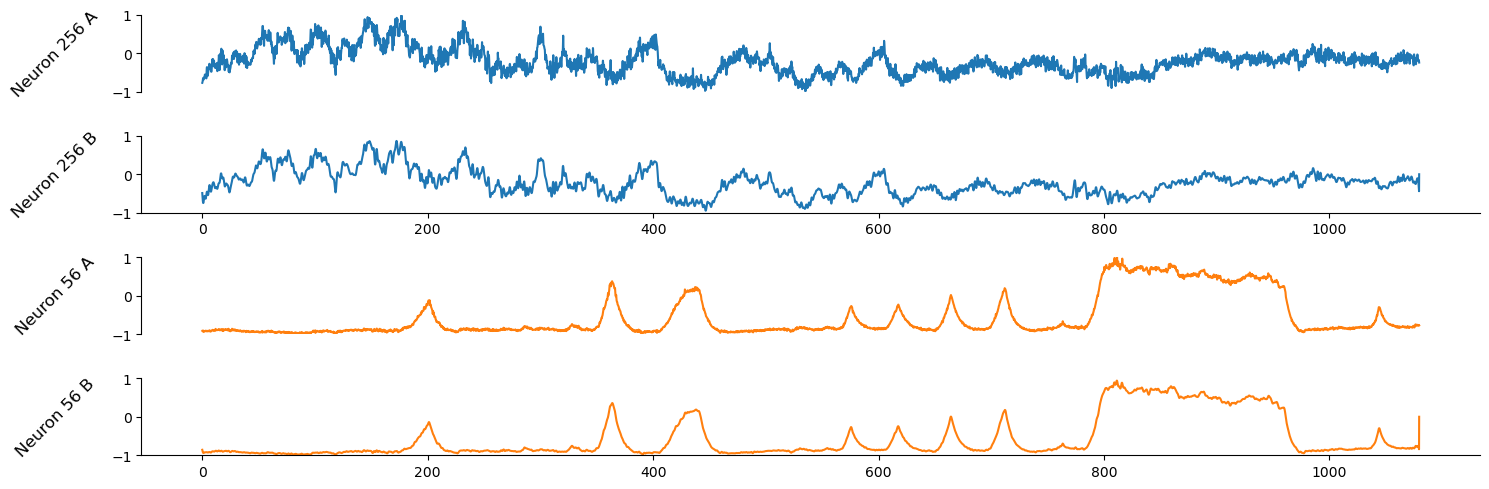

In [6]:
compare_signals(oneWorm['calcium_data'], oneWorm['smooth_calcium_data'], oneWorm['time_in_seconds'], [256, 56])

# Gaussian noise?
---

In [7]:
rep = 100
noise_level = np.zeros((rep, 302)) # rep x neurons

for r in range(rep):
    gaussian_noise = np.random.normal(0, 1, oneWorm['calcium_data'].shape)
    noise_level[r,:] = cosine_similarity(oneWorm['calcium_data'], gaussian_noise)

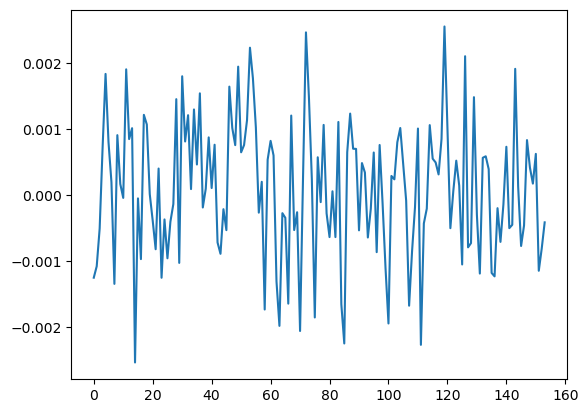

In [8]:
neuron_noise_level = np.mean(noise_level, axis=0)
active_neurons = np.where(neuron_noise_level != 0)[0]
plt.plot(neuron_noise_level[active_neurons])
plt.show()

# Moving Average
---

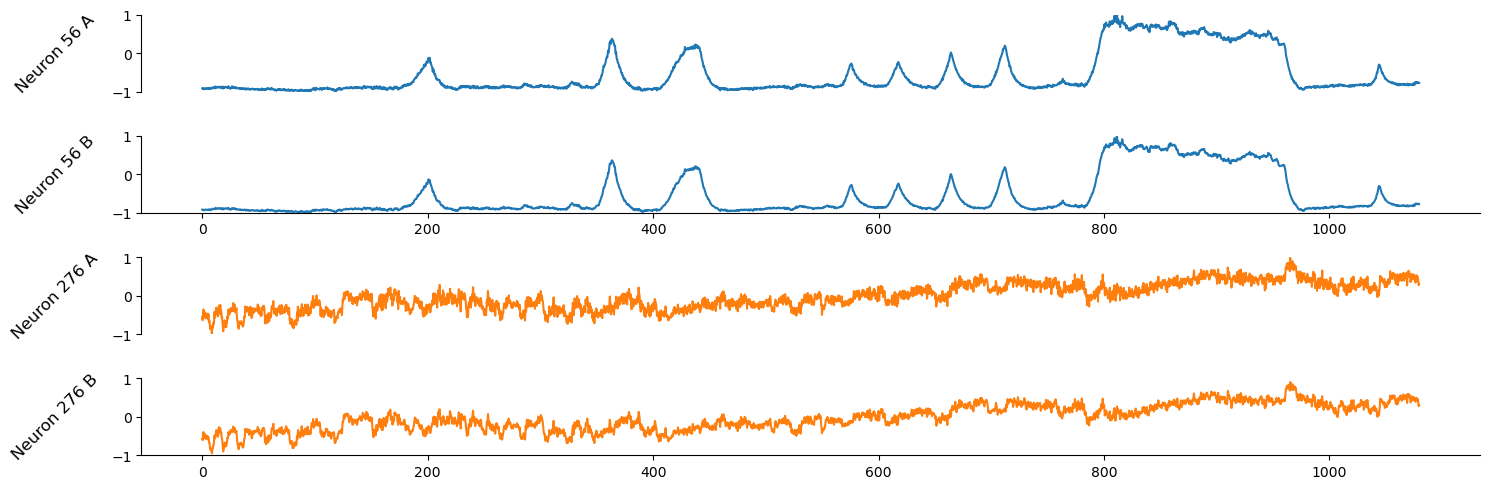

In [59]:
mvAvg = moving_average(oneWorm['calcium_data'], 5)
compare_signals(oneWorm['calcium_data'], mvAvg, oneWorm['time_in_seconds'], [56, 276])

# Gaussian Average
---

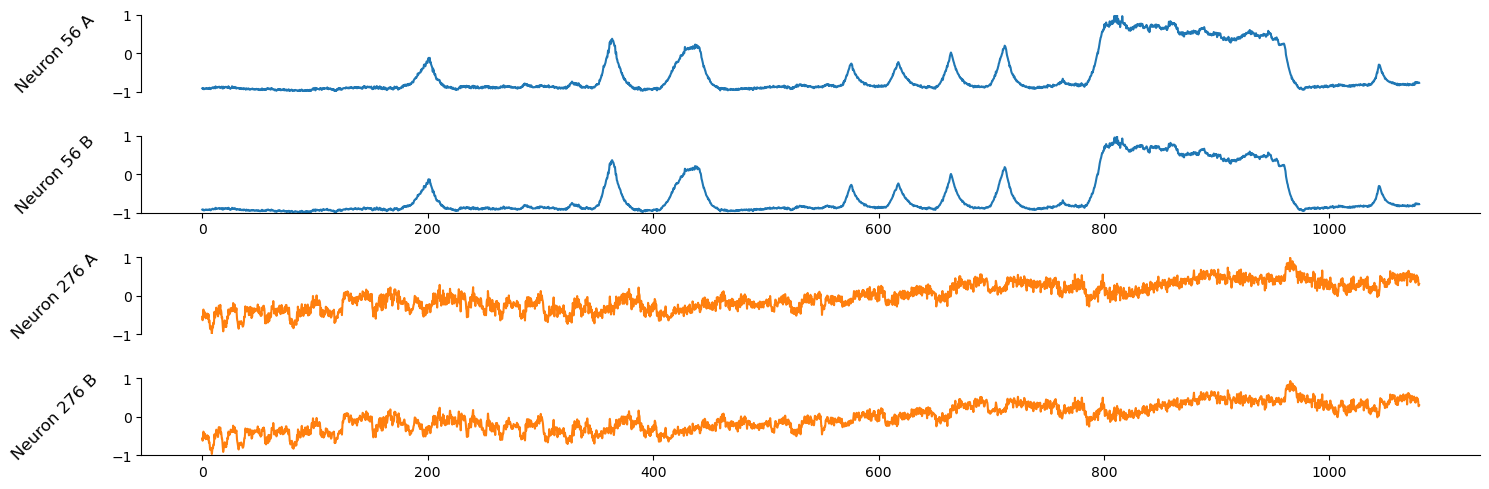

In [60]:
gAvg = gaussian_average(oneWorm['calcium_data'], 1)
compare_signals(oneWorm['calcium_data'], gAvg, oneWorm['time_in_seconds'], [56, 276])

# Median Filter
---

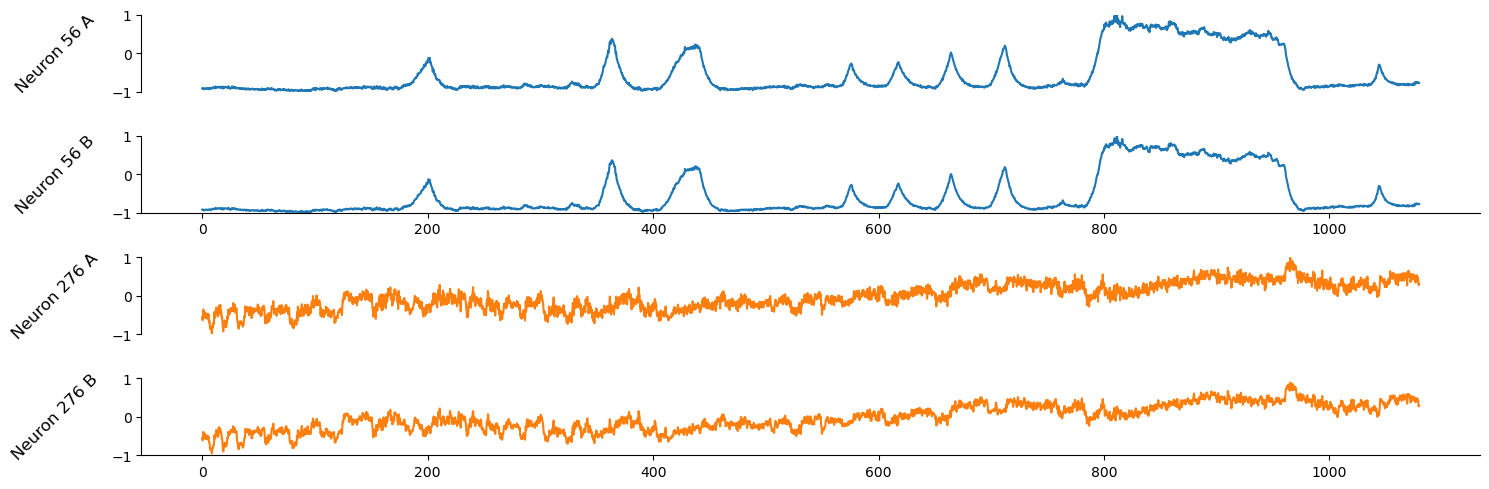

In [61]:
mFilter = median_filter(oneWorm['calcium_data'], 5)
compare_signals(oneWorm['calcium_data'], mFilter, oneWorm['time_in_seconds'], [56, 276])

# SG Filter
---

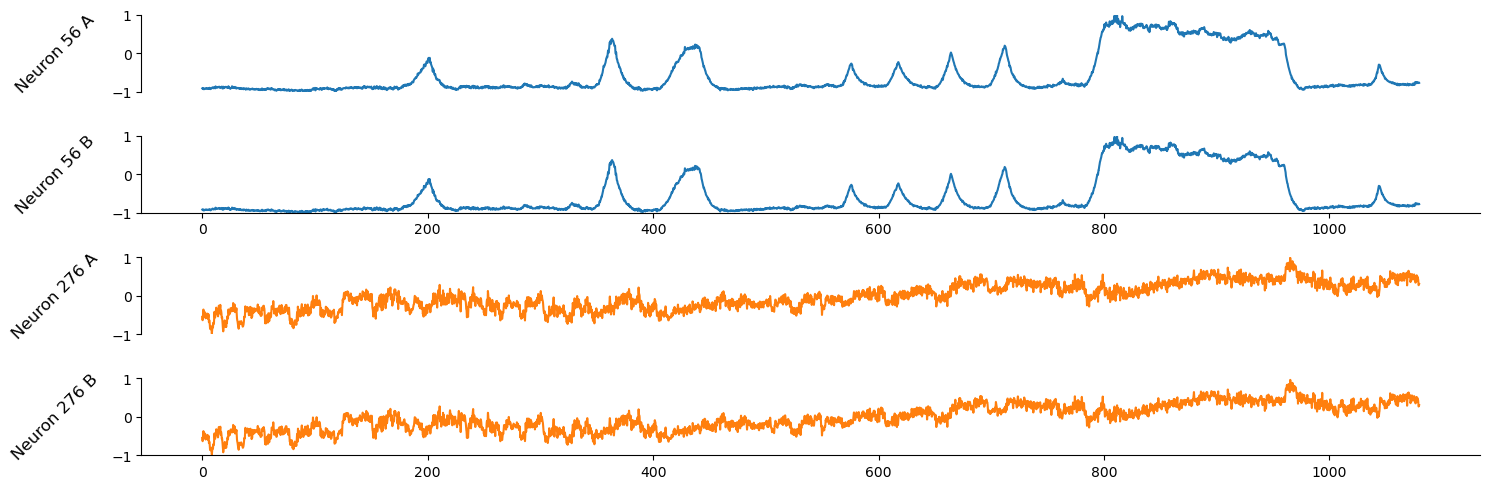

In [71]:
sgFilter = savitzky_golay_filter(oneWorm['calcium_data'], 5, 2)
compare_signals(oneWorm['calcium_data'], sgFilter, oneWorm['time_in_seconds'], [56, 276])

# FFT
---

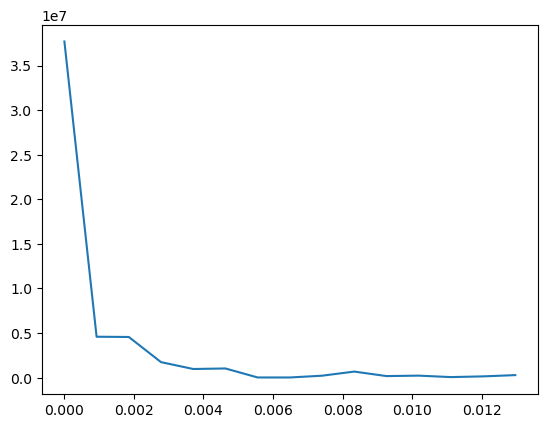

In [17]:
freq_filter = fft_filter(oneWorm['calcium_data'], oneWorm['dt'])
plt.plot(freq_filter.sample_freq[freq_filter.pos_mask][:15], freq_filter.power()[freq_filter.pos_mask, :][:15,56])
plt.show()

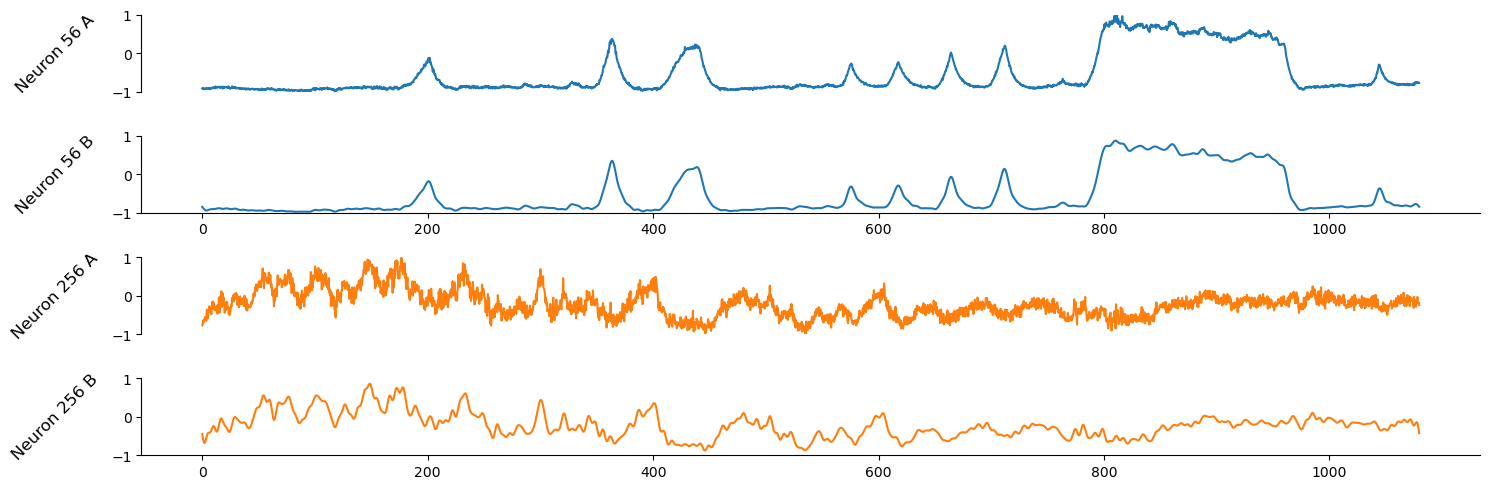

In [34]:
freq_filter = fft_filter(oneWorm['calcium_data'], oneWorm['dt'])
fft_data = freq_filter.filter(n=100)
compare_signals(oneWorm['calcium_data'], fft_data, oneWorm['time_in_seconds'], [56, 256])

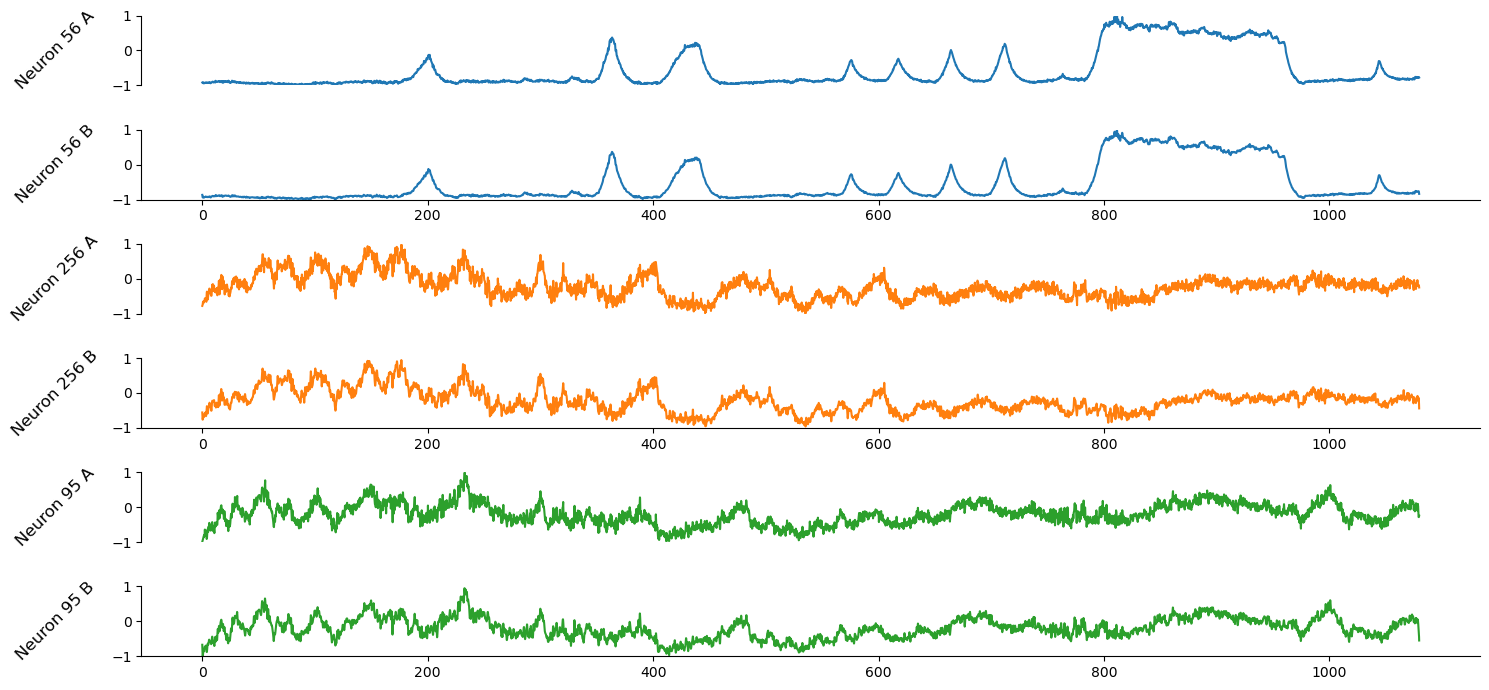

In [76]:
fft_data = frequency_filter(oneWorm['calcium_data'], oneWorm['dt'], 0.8)
compare_signals(oneWorm['calcium_data'], fft_data, oneWorm['time_in_seconds'], [56, 256, 95])

# Compare methods
---

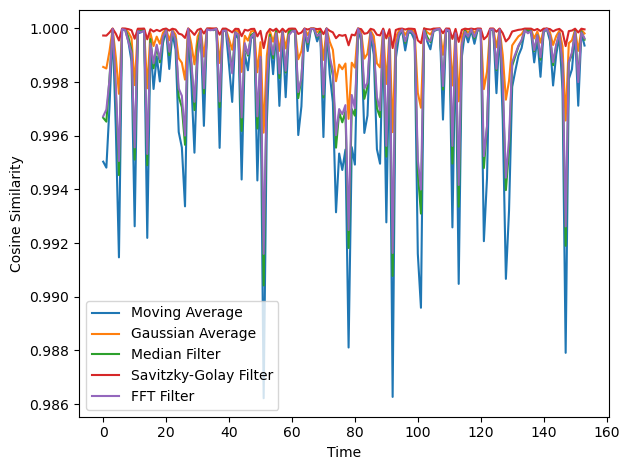

In [74]:
active_neurons = oneWorm['calcium_data'][:,oneWorm['neurons_mask']]

sim_mvAvg = cosine_similarity(active_neurons, mvAvg[:,oneWorm['neurons_mask']])
sim_gAvg = cosine_similarity(active_neurons, gAvg[:,oneWorm['neurons_mask']])
sim_mFilter = cosine_similarity(active_neurons, mFilter[:,oneWorm['neurons_mask']])
sim_sgFilter = cosine_similarity(active_neurons, sgFilter[:,oneWorm['neurons_mask']])
sim_fft = cosine_similarity(active_neurons, fft_data[:,oneWorm['neurons_mask']])

plt.plot(sim_mvAvg, label='Moving Average')
plt.plot(sim_gAvg, label='Gaussian Average')
plt.plot(sim_mFilter, label='Median Filter')
plt.plot(sim_sgFilter, label='Savitzky-Golay Filter')
plt.plot(sim_fft, label='FFT Filter')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cosine Similarity')
plt.tight_layout()
plt.show()